In [1]:
import sys
sys.path.append('/home/sophie/Workspace')

In [2]:
import numpy as np
from BrainEmbeddingPhase2.B2BNet.leave_one_utility \
    import LeaveOne

import matplotlib.pylab as plt
from scipy import stats  

experiment_path = 'Samsung_T5/Experiment2019/K-fold_NYU/'

In [3]:
to_hubs_test = LeaveOne(experiment_path)

100%|██████████| 216/216 [00:00<00:00, 927.35it/s]


(24, 188) (2, 192)


/home/sophie/Workspace/BrainEmbeddingPhase2/B2BNet/load_group_data.py:109: RuntimeWarning: invalid value encountered in true_divide
  individuals_relative[ta1a3_group[i]] = individuals_norm[ta1a3_group[i]] / norm_ta1a3


In [4]:
a1a3_clusters_to_hubs, typical_clusters_to_hubs, universal_clusters_to_hubs = \
to_hubs_test.clusters_to_hubs_leave_none()     

In [5]:
a1a3_clusters_to_hubs

[[[0.0,
   2.532144672242254,
   11.88965194847353,
   5.919461088708842,
   3.6751042073349796,
   3.0628304924221683,
   7.093634017834663,
   2.062058031436554,
   21.957147526950937,
   6.117033226905277,
   4.196938218532688,
   3.4922752852923975],
  [3.238145628376637,
   2.637229528764374,
   10.939230225709837,
   6.303877188896323,
   2.9852459664847424,
   3.3512483590849778,
   6.587808302063769,
   2.788196483449859,
   21.891656500166306,
   6.188270385714225,
   4.374404632746295,
   2.805567135508719],
  [3.8810165442319478,
   3.1417409751013716,
   12.421825389230808,
   6.418422506097299,
   5.1737072685520635,
   3.8823807927664475,
   7.662174075387801,
   2.838308808518451,
   22.828155020750767,
   6.566658253178608,
   5.249983037942044,
   5.519438642152541],
  [2.739985780263409,
   2.3299223964338314,
   11.008534591600936,
   5.46748124376735,
   3.102010666113525,
   3.246681396240002,
   6.133406233180669,
   2.321513976925401,
   21.689697008884192,
   5.

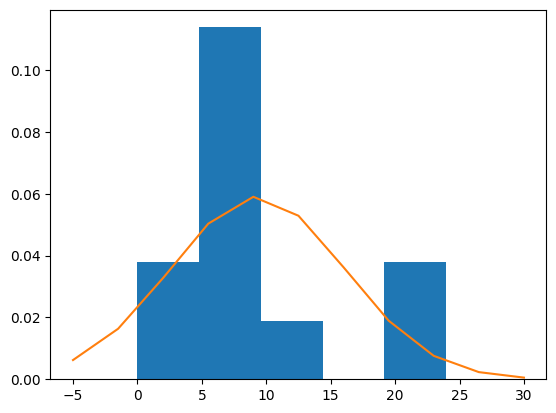

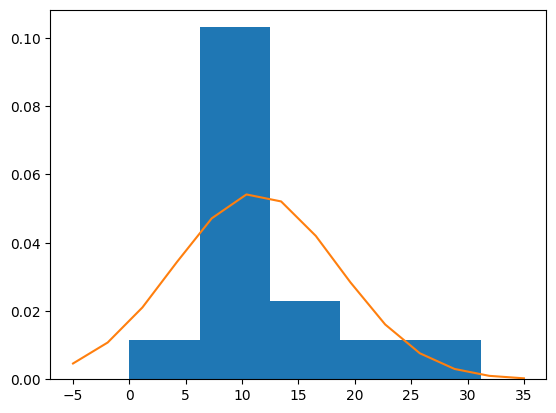

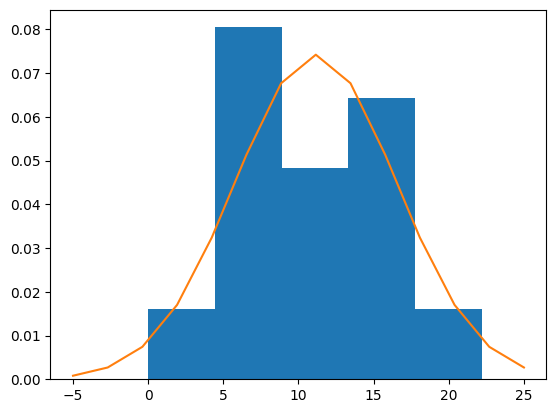

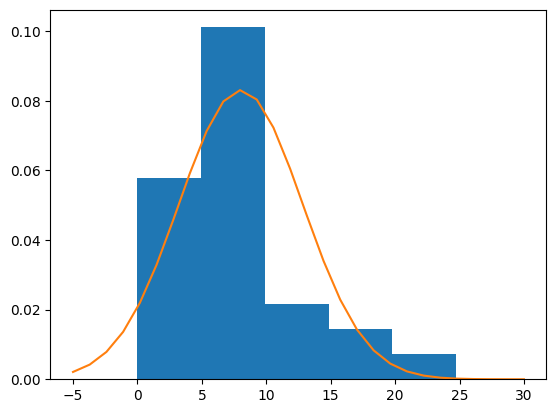

In [7]:

for i in range(len(typical_clusters_to_hubs)):
    plt.figure()
    ser = typical_clusters_to_hubs[i][i]

    # plot normed histogram
    plt.hist(ser, density=True, bins=5)

    # find minimum and maximum of xticks, so we know
    # where we should compute theoretical distribution
    xt = plt.xticks()[0]  
    xmin, xmax = min(xt), max(xt)  
    lnspc = np.linspace(xmin, xmax, len(ser))

    # lets try the normal distribution first
    m, s = stats.norm.fit(ser) # get mean and standard deviation  
    pdf_g = stats.norm.pdf(lnspc, m, s) # now get theoretical values in our interval  
    plt.plot(lnspc, pdf_g, label="Norm") # plot it

plt.show()

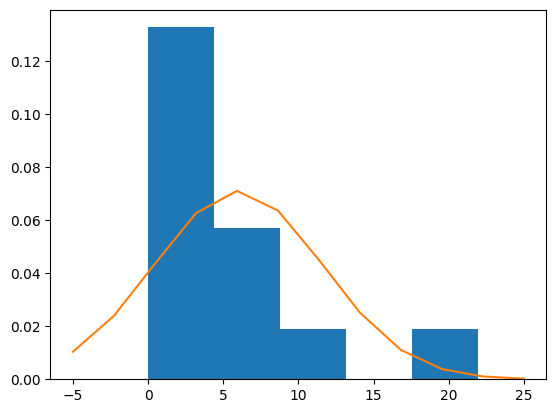

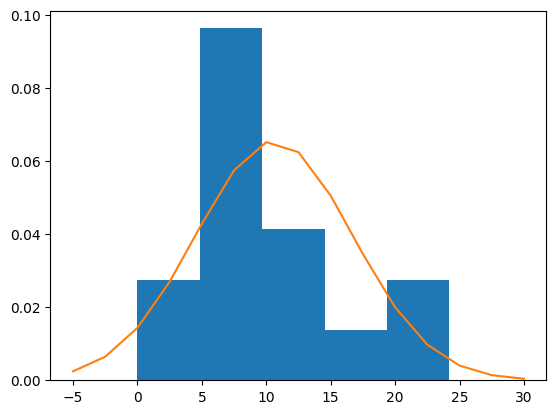

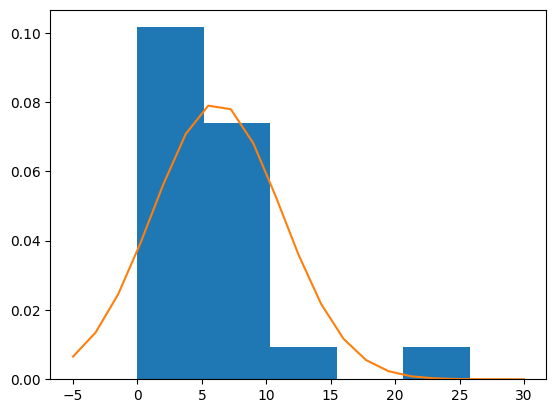

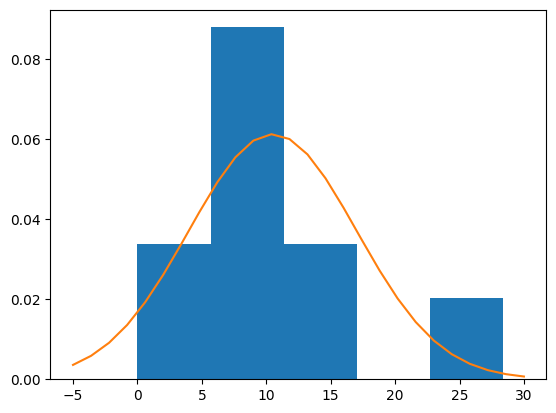

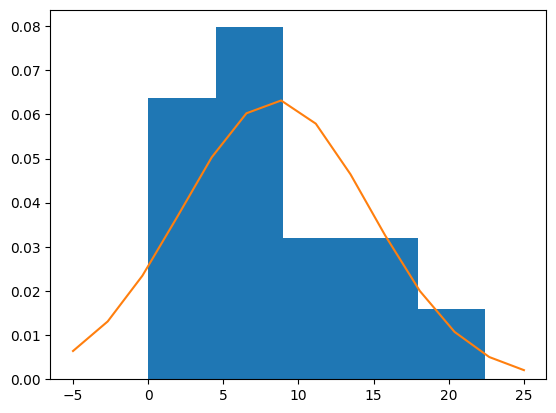

In [8]:


for i in range(len(a1a3_clusters_to_hubs)):
    plt.figure()

    ser = a1a3_clusters_to_hubs[i][i]

    # plot normed histogram
    plt.hist(ser, density=True, bins=5)

    # find minimum and maximum of xticks, so we know
    # where we should compute theoretical distribution
    xt = plt.xticks()[0]  
    xmin, xmax = min(xt), max(xt)  
    lnspc = np.linspace(xmin, xmax, len(ser))

    # lets try the normal distribution first
    m, s = stats.norm.fit(ser) # get mean and standard deviation  
    pdf_g = stats.norm.pdf(lnspc, m, s) # now get theoretical values in our interval  
    plt.plot(lnspc, pdf_g, label="Norm") # plot it

plt.show()
    
    

In [3]:
centroid_test = LeaveOne(experiment_path)
a1a3_centroid2centroid, typical_centroid2centroid, universal_centroid2centroid = centroid_test.centroid_to_centroid_leave_none()

100%|██████████| 216/216 [00:00<00:00, 911.08it/s]
/home/sophie/Workspace/BrainEmbeddingPhase2/B2BNet/load_group_data.py:109: RuntimeWarning: invalid value encountered in true_divide
  individuals_relative[ta1a3_group[i]] = individuals_norm[ta1a3_group[i]] / norm_ta1a3


(24, 188) (2, 192)


In [10]:
len_clusters = len(universal_clusters_to_hubs)
print(len_clusters)

10


(array([-5.,  0.,  5., 10., 15., 20., 25.]), <a list of 7 Text xticklabel objects>)


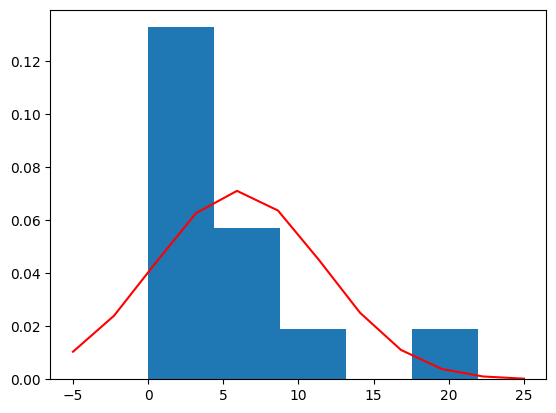

In [42]:
plt.figure()        
ser = universal_clusters_to_hubs[0][0]

# plot normed histogram
plt.hist(ser, density=True, bins=5)

# find minimum and maximum of xticks, so we know
# where we should compute theoretical distribution
xt = plt.xticks()[0]  
print(plt.xticks())
xmin, xmax = min(xt), max(xt)  
lnspc = np.linspace(xmin, xmax, len(ser))

# lets try the normal distribution first
m, s = stats.norm.fit(ser) # get mean and standard deviation  
pdf_g = stats.norm.pdf(lnspc, m, s) # now get theoretical values in our interval  
plt.plot(lnspc, pdf_g, label="Norm", c='r') # plot it

plt.show()

<Figure size 640x480 with 0 Axes>

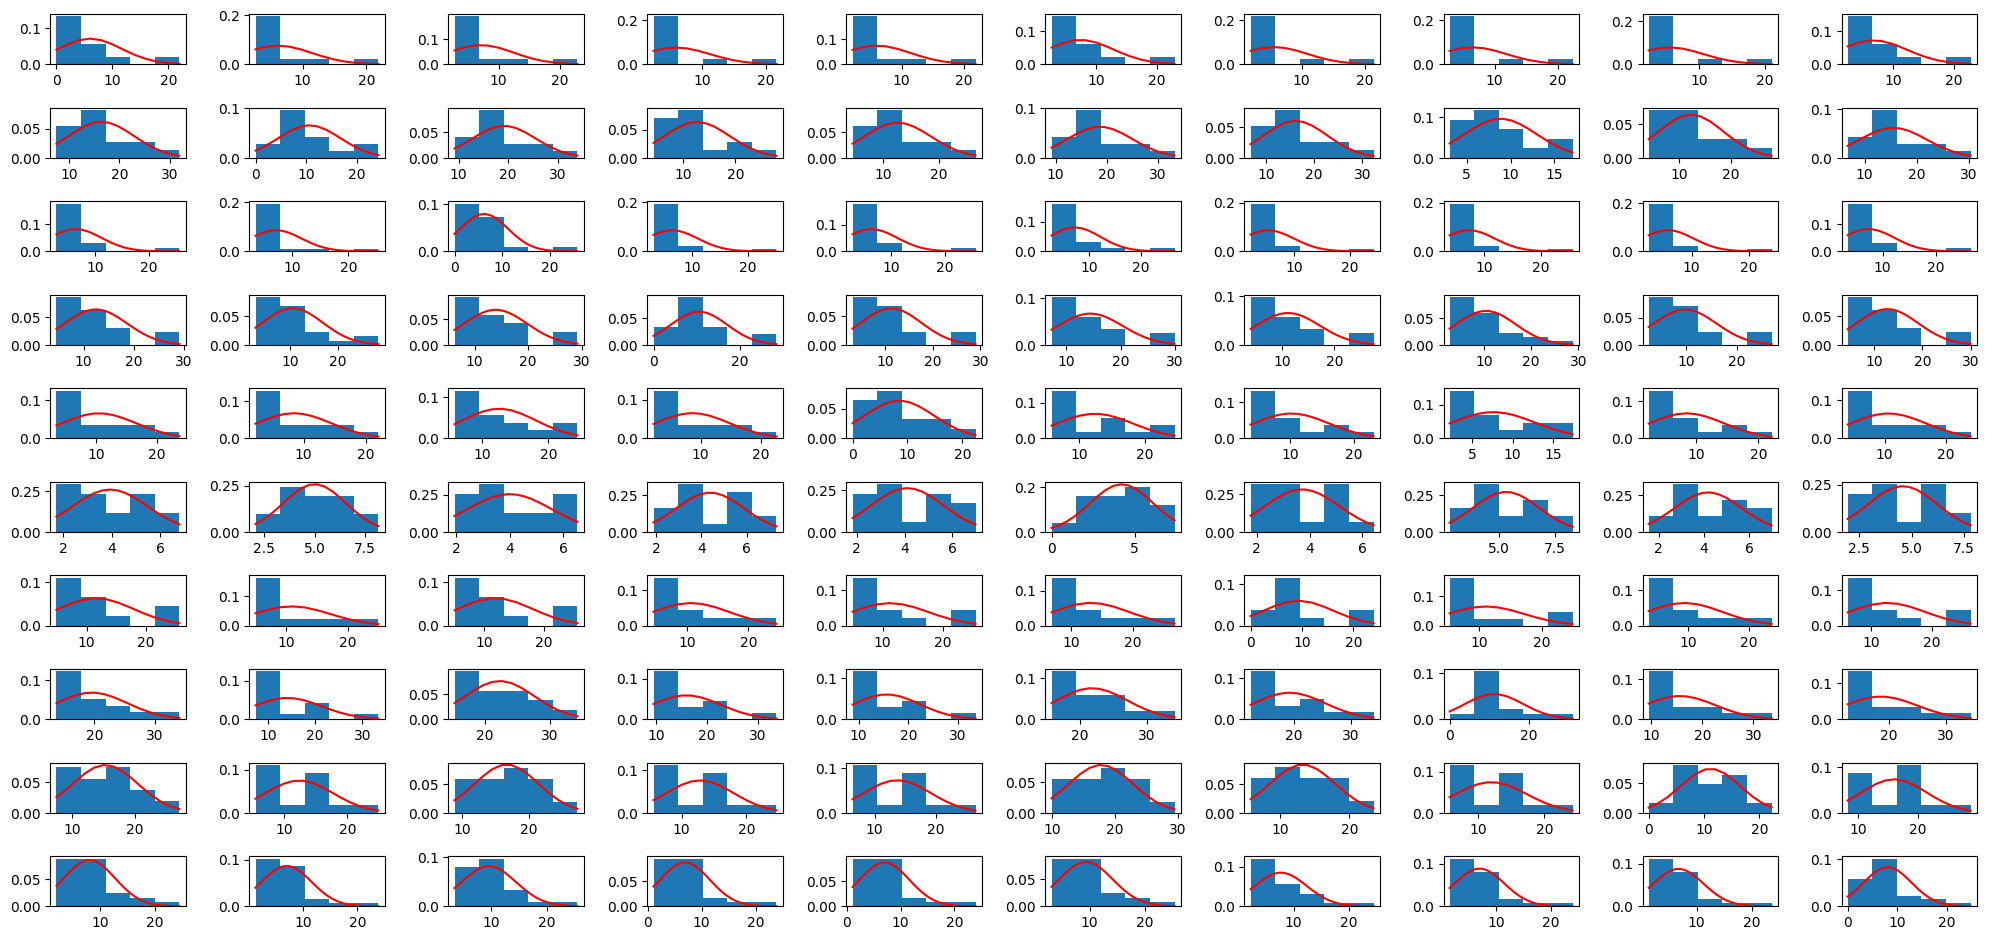

In [8]:
plt.figure()
# figsize=(200,100), dpi=100
len_clusters = len(universal_clusters_to_hubs)
fig, ax = plt.subplots(nrows=len_clusters, ncols=len_clusters, figsize=(20, 10))

for i in range(len_clusters):
    row = ax[i]
    for j in range(len_clusters):
        col = row[j]
        ser = universal_clusters_to_hubs[i][j]

        # plot normed histogram
        col.hist(ser, density=True, bins=5)

        # find minimum and maximum of xticks, so we know
        # where we should compute theoretical distribution
        
        # xt = plt.xticks()[0]  
        xmin, xmax = min(ser), max(ser) 
        lnspc = np.linspace(xmin, xmax, len(ser))

        # lets try the normal distribution first
        m, s = stats.norm.fit(ser) # get mean and standard deviation  
        pdf_g = stats.norm.pdf(lnspc, m, s) # now get theoretical values in our interval  
        col.plot(lnspc, pdf_g, label="Norm", c='r') # plot it

        
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [15]:
a1a3_clusters_to_hubs

[[0.0,
  2.532144672242254,
  11.88965194847353,
  5.919461088708842,
  3.6751042073349796,
  3.0628304924221683,
  7.093634017834663,
  2.062058031436554,
  21.957147526950937,
  6.117033226905277,
  4.196938218532688,
  3.4922752852923975],
 [7.634011331712524,
  20.099456554378076,
  7.822810526976796,
  8.60121079959637,
  7.032999312451391,
  0.0,
  24.219584572028154,
  7.388143805568996,
  13.460318857295666,
  18.55001925396059,
  11.141106331565743,
  12.086943988322643,
  4.124478803385131,
  8.111516415197114,
  8.938707859683916],
 [8.837286320066346,
  5.558887125267083,
  4.94685274438271,
  25.786426905378224,
  4.520582915626312,
  11.660024358099342,
  6.708639922015853,
  5.649765044342705,
  6.008511405063104,
  2.2615218778987645,
  6.175422908012769,
  3.914280201325998,
  4.7800224283007955,
  8.657680529831355,
  3.1176097873255655,
  0.0,
  2.901198507485767,
  5.130918553214449,
  5.515391191269111,
  4.455330870721492,
  3.358229559818164],
 [6.572131808681489

In [4]:
print(universal_centroid2centroid)

[[ 0.          5.01805033  4.06801433  2.54976407  4.33819497  5.78933901
   3.93720348  4.36553     3.59187684  3.75871704]
 [16.84085438  0.         17.96408089  9.86204589  8.16828144 19.63294965
  15.41855256  4.21659926  9.40815788 10.69929245]
 [ 5.11432099  6.15911196  0.          3.32433866  5.25844237  6.26244079
   4.50041524  5.27505499  4.29658628  4.815479  ]
 [ 8.70429093  7.61887052  8.18984005  0.          7.66802245 11.41588053
   7.28918152  6.1667637   5.34205305  6.5967167 ]
 [ 7.70582023  3.96047931  7.96236523  4.56069757  0.          9.46879201
   6.9095663   3.34720544  4.7391981   5.23801844]
 [ 1.76856241  2.98756178  1.43608559  1.5618369   1.89361659  0.
   1.53537755  2.78033127  2.04849126  1.31868247]
 [ 8.2077828   7.74655608  7.30453743  4.67046285  7.30935419 10.14398532
   0.          6.70092952  5.23641027  6.29329804]
 [16.50431385  6.75162342 17.19013366 10.83939421  9.72200238 18.97010929
  15.31136242  0.         10.9788832  11.95606251]
 [ 8.903

In [6]:
np.shape(np.concatenate([
    centroid_test.leave_none['typical_local_centroids'],
    centroid_test.leave_none['a1a3_local_centroids']
]))

(10, 200, 200)

In [3]:
leave_none_test = LeaveOne(experiment_path)
prob_a1a3_in_a1a3, prob_a1a3_in_typical,\
prob_typical_in_a1a3, prob_typical_in_typical = leave_none_test.leave_none_test()

100%|██████████| 216/216 [00:00<00:00, 906.93it/s]
/home/sophie/Workspace/BrainEmbeddingPhase2/B2BNet/load_group_data.py:109: RuntimeWarning: invalid value encountered in true_divide
  individuals_relative[ta1a3_group[i]] = individuals_norm[ta1a3_group[i]] / norm_ta1a3


(24, 188) (2, 192)


/home/sophie/Workspace/BrainEmbeddingPhase2/B2BNet/latent_group_utility.py:52: RuntimeWarning: divide by zero encountered in log
  np.log(norm_distribution.pdf(diver_x_set_cent_b2[subject_index, centroid_index]))


In [4]:
to_typical_max, to_a1a3_max =  leave_none_test.get_max_prob(
    prob_a1a3_in_a1a3, prob_a1a3_in_typical, prob_typical_in_a1a3, prob_typical_in_typical)

In [5]:
import pandas as pd

In [10]:
data = {'prob_a1a3_in_a1a3': prob_a1a3_in_a1a3,
        'prob_a1a3_in_typical': prob_a1a3_in_typical,
        'prob_typical_in_a1a3': prob_typical_in_a1a3,
        'prob_typical_in_typical' :prob_typical_in_typical
       }

In [6]:
np.shape(prob_a1a3_in_a1a3)

(88, 5)

In [7]:
prob_a1a3_in_universal = np.concatenate((prob_a1a3_in_a1a3, prob_a1a3_in_typical), axis=1)

In [8]:
np.shape(prob_a1a3_in_universal)

(88, 10)

In [9]:
prob_typical_in_universal = np.concatenate((prob_typical_in_a1a3, prob_typical_in_typical), axis=1)

In [10]:
np.shape(prob_typical_in_universal)

(84, 10)

In [11]:
df_prob_a1a3_in_universal = pd.DataFrame(prob_a1a3_in_universal)
df_prob_typical_in_universal = pd.DataFrame(prob_typical_in_universal)

In [12]:
prefix = '/media/sophie/'
with pd.ExcelWriter(prefix+experiment_path+"leave_none_prob.xlsx") as writer:  # doctest: +SKIP
    df_prob_a1a3_in_universal.to_excel(writer, sheet_name='prob_a1a3_in_universal') 
    df_prob_typical_in_universal.to_excel(writer, sheet_name='prob_typical_in_universal') 

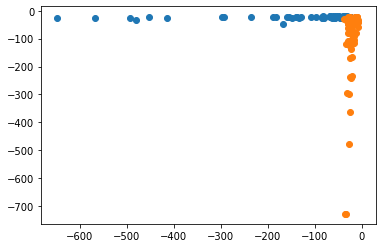

In [6]:
import matplotlib.pyplot as plt
plt.scatter(to_typical_max[:84], to_a1a3_max[:84] )
plt.scatter(to_typical_max[84:], to_a1a3_max[84:] )
plt.show()

In [5]:
leave_none_test.leave_one_regression_sort(to_typical_sort, to_a1a3_sort)

100%|██████████| 172/172 [00:01<00:00, 150.16it/s]


{'mean_score': 0.953794369645043,
 'accurate_count': 162,
 'f1_score': 0.9411764705882352}

In [6]:
leave_none_test.leave_one_regression_max(to_typical_max, to_a1a3_max)

100%|██████████| 172/172 [00:00<00:00, 278.61it/s]


{'mean_score': 0.9365225078199374,
 'accurate_count': 161,
 'f1_score': 0.935672514619883}

In [7]:
leave_one_test = LeaveOne(experiment_path)
to_typical_max, to_a1a3_max, to_typical_sort, to_a1a3_sort = leave_one_test.leave_one_test()

100%|██████████| 216/216 [00:00<00:00, 896.23it/s]
/home/sophie/Workspace/BrainEmbeddingPhase2/B2BNet/load_group_data.py:109: RuntimeWarning: invalid value encountered in true_divide
  individuals_relative[ta1a3_group[i]] = individuals_norm[ta1a3_group[i]] / norm_ta1a3
  0%|          | 0/172 [00:00<?, ?it/s]

(24, 188) (2, 192)


/home/sophie/Workspace/BrainEmbeddingPhase2/B2BNet/latent_group_utility.py:52: RuntimeWarning: divide by zero encountered in log
  np.log(norm_distribution.pdf(diver_x_set_cent_b2[subject_index, centroid_index]))
100%|██████████| 172/172 [04:34<00:00,  1.63s/it]


In [8]:
leave_one_test.leave_one_regression_sort(to_typical_sort, to_a1a3_sort, train_type="leave one")

100%|██████████| 172/172 [00:00<00:00, 172.33it/s]


{'mean_score': 0.5936352509179927,
 'accurate_count': 95,
 'f1_score': 0.4210526315789474}

In [9]:
leave_one_test.leave_one_regression_max(to_typical_max, to_a1a3_max, train_type="leave one")

100%|██████████| 172/172 [00:00<00:00, 301.52it/s]


{'mean_score': 0.526689786481708,
 'accurate_count': 86,
 'f1_score': 0.17307692307692304}

In [10]:
import matplotlib.pyplot as plt  
plt.clf()
plt.figure(figsize=(6, 4))
plt.scatter(to_typical_max[88:], 
            to_a1a3_max[88:], 
            label='Individuals in group TDC', s=10,
            facecolors='none',
            edgecolors='tab:orange',
            marker='s')
plt.scatter(to_typical_max[:88], 
            to_a1a3_max[:88], 
            label='Individuals in group ADHD', s=10,
            facecolors='none',
            edgecolors='tab:blue',
            marker='o')

plt.tick_params(labelsize=12)
plt.ylabel('Maximum probability in ADHD clusters', fontsize=12)
plt.xlabel('Maximum probability in TDC clusters', fontsize=12)

plt.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left",
           borderaxespad=0,
           shadow=True, fancybox=True, fontsize=12)
plt.show()

<Figure size 640x480 with 0 Axes>

In [15]:
np.shape(to_typical_max)

(172, 1)

In [20]:
prefix = '/media/sophie/'
np.save(prefix+experiment_path+'leave_one_to_typical_max',to_typical_max) 
np.save(prefix+experiment_path+'leave_one_to_a1a3_max',to_a1a3_max) 
np.save(prefix+experiment_path+'leave_one_to_typical_sort',to_typical_sort)
np.save(prefix+experiment_path+'leave_one_to_a1a3_sort',to_a1a3_sort)

In [6]:
prefix = '/media/sophie/'
leave_one_to_typical_max = np.load(prefix+experiment_path+'leave_one_to_typical_max.npy')

In [7]:
leave_one_to_a1a3_max = np.load(prefix+experiment_path+'leave_one_to_a1a3_max.npy')

In [8]:
leave_one_to_typical_max

array([[ -28.20822071],
       [ -55.854597  ],
       [ -81.10648609],
       [-220.18889816],
       [         -inf],
       [ -27.6520617 ],
       [ -27.12616379],
       [ -38.61535421],
       [ -89.30672894],
       [ -65.5814963 ],
       [-450.43222708],
       [ -28.35068371],
       [ -71.94832301],
       [         -inf],
       [ -36.75328582],
       [         -inf],
       [ -41.84840033],
       [         -inf],
       [ -29.09217237],
       [-157.763815  ],
       [-191.20624716],
       [ -77.73377649],
       [ -29.71856   ],
       [-112.77702982],
       [ -37.05120721],
       [ -27.51823059],
       [ -59.95362978],
       [ -41.18394865],
       [ -29.28764883],
       [ -31.43914785],
       [ -46.02223434],
       [ -73.73031014],
       [ -28.7561903 ],
       [-138.84512028],
       [ -25.96485062],
       [-378.06138483],
       [ -43.45964882],
       [ -38.57306769],
       [ -28.82310713],
       [ -52.06675861],
       [-113.35858263],
       [ -40.724